Introduction to GeoPandas
=============================

<a id='Table-of-Contents'></a>
Table of Contents
------------------
 - [Requesting a dataset remotely](#requestfileremotely)
 - [Supported filetypes geopandas will open](#supported_drivers)
 - [Inspect file returned from remote](#inspectfile)
 - [Pandas to GeoPandas: the GeoSeries and GeoDataFrame](#pan2geo)
 - [GeoSeries attributes](#geoseriesattrib)
  - [area](#area)
  - [bounds](#bounds)
  - [area, bounds, is_valid, crs, and centroid use examples](#otheruseexamples)
 - [Toward mapping: a basic GeoPandas workflow](#workflow)
  - [supported drivers for to_file](#drivers)
  - [write to shapefile](#writeshape)
  - [write to geojson](#writegeojson)
 - [Plotting geospatial data](#plotgeo)
  - [make sub-selections of a DataFrame](#subselections)
  - [write sub-selection to shapefile](#writesubselect)
  - [read shapefile](#readshape1)
  - [check if json data file exist and delete if exist](#checkfile)
  - [write geojson](#writegeojson2)
  - [set X and Y axis limits with Matplotlib](#setxyaxis)
 - [Adjusting/managing projections](#adjustproj)
  - [create a new GeoDataFrame of Portugal](#sliceportugal)
  - [set dataframe to new projection](#setprojection)
  - [plot Portugal](#plotportugal)
  - [add the europe GeoDataFrame as the basemap](#baseeurope)

***

#### Additional Examples
 - [Adding a background tile map to plots](#tilemaps)
 - [Plotting with Geoplot](#plotgeoplot)
  - [use size as a visual variable using cartogram](#cartogram)
  - [use color as a visual variable - specify choropleth](#chloropleth)
  - [re-project data into any of the map projections provided by CartoPy](#cartopy) 
 - [Aggregate geometric features - dissolve function](#dissolve)
  - [aggregate the geodataframe by continents](#aggcontinent)
  - [plot the new geodataframe](#plotnewgeo)
  - [add color based on the pop_est for each continent; display legend to the right of the plot-legend_kwds](#displegend)
 - [Creating a GeoDataFrame from a DataFrame with coordinates](#Creating_GeoDataFrame_DataFrame_with_coordinates)
  - [create a Shapely object for geodataframe](#GeoDataFrame_needs_shapely_object)
  - [transform tuples to Point](#transform_tuples)
  - [create the GeoDataFrame](#CreateGeoDataFrame)
  - [plot geodataframe coordinates](#plot_geodataframe)
  - [plot a specific column](#plot_column)


***

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import geoplot
import fiona
import pysal
import os

C:\Users\mdcr226\AppData\Local\Continuum\anaconda3\envs\sandbox\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\mdcr226\AppData\Local\Continuum\anaconda3\envs\sandbox\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


<a id='requestfileremotely'></a>
#### Request a dataset from a remote server
A packed archive collection of Shapefiles contained within a .zip file.

In [2]:
countries_raw = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip')

<a id='supported_drivers'></a>
#### For a __list of supported drivers__ geopandas (fiona) will open, use the following command:
`fiona.supported_drivers`

<a id='inspectfile'></a>
#### Inspect the object returned from read_file()

In [3]:
type(countries_raw)

geopandas.geodataframe.GeoDataFrame

In [4]:
countries_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 95 columns):
featurecla    241 non-null object
scalerank     241 non-null int64
LABELRANK     241 non-null int64
SOVEREIGNT    241 non-null object
SOV_A3        241 non-null object
ADM0_DIF      241 non-null int64
LEVEL         241 non-null int64
TYPE          241 non-null object
ADMIN         241 non-null object
ADM0_A3       241 non-null object
GEOU_DIF      241 non-null int64
GEOUNIT       241 non-null object
GU_A3         241 non-null object
SU_DIF        241 non-null int64
SUBUNIT       241 non-null object
SU_A3         241 non-null object
BRK_DIFF      241 non-null int64
NAME          241 non-null object
NAME_LONG     241 non-null object
BRK_A3        241 non-null object
BRK_NAME      241 non-null object
BRK_GROUP     3 non-null object
ABBREV        241 non-null object
POSTAL        241 non-null object
FORMAL_EN     229 non-null object
FORMAL_FR     5 non-null object
NAME_CIAWF    

In [5]:
countries_raw.describe()

,scalerank,LABELRANK,ADM0_DIF,LEVEL,GEOU_DIF,SU_DIF,BRK_DIFF,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,...,ADM0_A3_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID
count,241.000000,241.000000,241.000000,241.0,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,...,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02
mean,1.867220,4.149378,0.211618,2.0,0.0,0.008299,0.029046,3.348548,3.622407,3.858921,...,-99.0,8.908714,10.082988,5.041494,-75.651452,-16.012448,0.085892,3.684647,8.531120,1.159321e+09
std,1.316167,1.432687,0.409306,0.0,0.0,0.090908,0.168284,1.815124,1.909013,2.184418,...,0.0,4.213071,6.073968,1.496642,43.030063,37.652410,0.677963,1.069605,1.155993,3.354489e+02
min,1.000000,2.000000,0.000000,2.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,-99.0,4.000000,4.000000,3.000000,-99.000000,-99.000000,0.000000,1.700000,5.200000,1.159320e+09
25%,1.000000,3.000000,0.000000,2.0,0.0,0.000000,0.000000,2.000000,2.000000,2.000000,...,-99.0,6.000000,6.000000,4.000000,-99.000000,1.000000,0.000000,3.000000,8.000000,1.159321e+09
50%,1.000000,4.000000,0.000000,2.0,0.0,0.000000,0.000000,3.000000,4.000000,4.000000,...,-99.0,8.000000,8.000000,5.000000,-99.000000,1.000000,0.000000,4.000000,9.000000,1.159321e+09
75%,3.000000,6.000000,0.000000,2.0,0.0,0.000000,0.000000,5.000000,5.000000,6.000000,...,-99.0,10.000000,12.000000,6.000000,-99.000000,1.000000,0.000000,4.500000,9.500000,1.159321e+09
max,6.000000,7.000000,1.000000,2.0,0.0,1.000000,1.000000,7.000000,8.000000,9.000000,...,-99.0,25.000000,35.000000,13.000000,6.000000,1.000000,7.000000,6.500000,11.000000,1.159321e+09


In [6]:
countries_raw.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,POLYGON ((31.28789062500002 -22.40205078125001...
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"(POLYGON ((104.06396484375 10.3908203125, 104...."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,(POLYGON ((-60.82119140624999 9.13837890624999...



[top](#Table-of-Contents)

<a id='pan2geo'></a>
### Pandas to GeoPandas: the GeoSeries and GeoDataFrame
Access and select a single column's values such as the ADMIN names and assign the result to a variable (dot notation would work here too):

In [7]:
admin_names = countries_raw['ADMIN']
admin_names

0                               Zimbabwe
1                                 Zambia
2                                  Yemen
3                                Vietnam
4                              Venezuela
5                                Vatican
6                                Vanuatu
7                             Uzbekistan
8                                Uruguay
9         Federated States of Micronesia
10                      Marshall Islands
11              Northern Mariana Islands
12          United States Virgin Islands
13                                  Guam
14                        American Samoa
15                           Puerto Rico
16              United States of America
17         South Georgia and the Islands
18        British Indian Ocean Territory
19                          Saint Helena
20                      Pitcairn Islands
21                              Anguilla
22                      Falkland Islands
23                        Cayman Islands
24              

In [8]:
type(admin_names) 

pandas.core.series.Series

In [9]:
geoms = countries_raw.geometry
type(geoms)

geopandas.geoseries.GeoSeries

[top](#Table-of-Contents)

<a id='geoseriesattrib'></a>
### GeoSeries attributes
For a full list of all available attributes see the [GeoSeries Reference](http://geopandas.org/reference.html)

[top](#Table-of-Contents)
<a id='area'></a>
### area
List the area of all the countries in the `countries` dataset

In [10]:
countries_raw.area.head()

0    33.389352
1    62.886921
2    38.204311
3    27.856863
4    74.594288
dtype: float64

[top](#Table-of-Contents)
<a id='bounds'></a>
### bounds
tuple of max and min coordinates on each axs to each shape

In [11]:
countries_raw.bounds.head()

,minx,miny,maxx,maxy
0,25.224023,-22.402051,33.006738,-15.643066
1,21.978906,-18.041504,33.661523,-8.193652
2,42.549023,12.318994,54.511133,18.996143
3,102.127441,8.583252,109.444922,23.345215
4,-73.366211,0.687988,-59.828906,12.177881


[top](#Table-of-Contents)
<a id='otheruseexamples'></a>
### area, bounds, is_valid, crs, and centroid use examples
`area:` shape area (units of projection – see [projections](http://geopandas.org/projections.html)  
`bounds:` tuple of max and min coordinates on each axis for each shape  
`total_bounds:` tuple of max and min coordinates on each axis for entire GeoSeries  
`geom_type:` type of geometry.  
`is_valid:` tests if coordinates make a shape that is reasonable geometric shape (according to this).  

In [12]:
china = countries_raw.loc[countries_raw['ADMIN'] == 'China']
print('area: ', china.area) 
print('bounds: ', china.bounds)
print('Is valid?: ', china.is_valid)
print('CRS: ', china.crs)
print('centroid: ', china.centroid)

area:  195    950.981107
dtype: float64
bounds:            minx       miny        maxx       maxy
195  73.607324  18.218262  134.752344  53.555615
Is valid?:  195    True
dtype: bool
CRS:  {'init': 'epsg:4326'}
centroid:  195    POINT (103.8190731458241 36.56176537925268)
dtype: object


[top](#Table-of-Contents)
<a id='workflow'></a>
### Toward mapping: a basic GeoPandas workflow

<a id='drivers'></a>
#### supported drivers to use with GeoDataFrame.tofile()

Writing the geo dataframe to a file is as simple as `GeoDataFrame.to_file()` 
This command will write the required Shapefiles to disk.  
For a list of available formats use: 

In [13]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

<a id='writeshape'></a>
#### write a shapefile
The command: `countries_raw.to_file('shapes/countries/')` 
 - Creates a new directory named countries within the current working directory
 - Writes the 3 required Shapefiles into that directory, as well as the very useful countries.shp encoding our CRS information and the less useful countires.cpg file

In [14]:
countries_raw.to_file('shapes/countries')

C:\Users\mdcr226\AppData\Local\Continuum\anaconda3\envs\sandbox\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


#### reload the countries dataframe from shapefile

In [15]:
countries = gpd.read_file('./shapes/countries/countries.shp')
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,????,Zimbabwe,Zimbabwe,Zimbábue,????????,Zimbabwe,Zimbabve,Zimbabwe,???,POLYGON ((31.28789062500002 -22.40205078125001...
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,???,Zambia,Zambia,Zâmbia,??????,Zambia,Zambiya,Zambia,???,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,??,Jemen,Jemen,Iémen,?????,Jemen,Yemen,Yemen,??,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,???,Vietnam,Wietnam,Vietname,???????,Vietnam,Vietnam,Vi?t Nam,??,"(POLYGON ((104.06396484375 10.3908203125, 104...."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,?????,Venezuela,Wenezuela,Venezuela,?????????,Venezuela,Venezuela,Venezuela,????,(POLYGON ((-60.82119140624999 9.13837890624999...


[top](#Table-of-Contents)
<a id='writegeojson'></a>
#### writing GeoJSON to file


In [16]:
if os.path.exists('data/countries.json'):
  os.remove('data/countries.json')

#### To write to GeoJSON: 

#### An alternative way to write to GeoJSON

In [17]:
with open('./data/countries.json', 'w') as f:
    f.write(countries_raw.to_json())

#### reading geojson doesnt work for files created using `to_file` method.  Alternate write file reads?  Solution below.  
The file created using the `to_file` method loads into geojson.io.  However geojson.io won't read the file created using the `write` method. Even more strange is the geojson.io won't read the file created using the `write` method.  
__Solution:__ edit the file created using the `to_file` method, removing the line `"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },`

In [18]:
countries = gpd.read_file('./data/countries.json')

countries.head()

,id,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,POLYGON ((31.28789062500002 -22.40205078125001...
1,1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"(POLYGON ((104.06396484375 10.3908203125, 104...."
4,4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,(POLYGON ((-60.82119140624999 9.13837890624999...


In [19]:
countries.crs

{'init': 'epsg:4326'}

[top](#Table-of-Contents)
<a id='plotgeo'></a>
### Plotting geospatial data

#### use the `.plot()` method to produce a basic visualization of our dataset

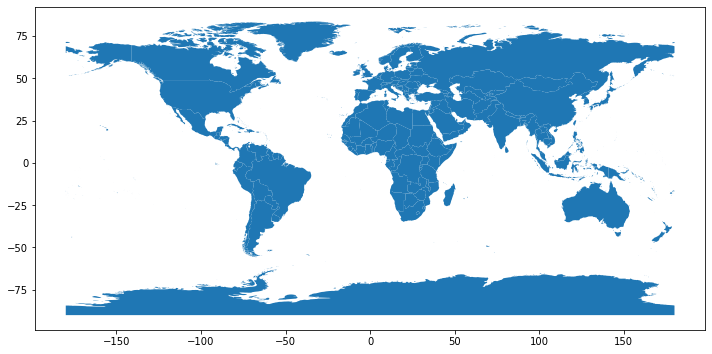

In [20]:
ax = countries.plot(figsize=(12,12));

[top](#Table-of-Contents)
<a id='subselections'></a>
#### make sub-selections of a DataFrame
For example, if we only want the countries with the `CONTINENT` attribute of `Europe`, we can select those, assign them to a new variable, and even write them back out to disk as a GeoJSON:

In [21]:
europe = countries.loc[countries['CONTINENT'] == 'Europe']
europe.head()

,id,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
5,5,Admin-0 country,6,6,Vatican,VAT,0,2,Sovereign country,Vatican,...,바티칸 시국,Vaticaanstad,Watykan,Vaticano,Ватикан,Vatikanstaten,Vatikan,Thành Vatican,梵蒂冈,"POLYGON ((12.43916015625001 41.898388671875, 1..."
28,28,Admin-0 country,4,6,United Kingdom,GB1,1,2,Country,Jersey,...,저지 섬,Jersey,Jersey,Jersey,Джерси,Jersey,Jersey,Jersey,澤西島,"POLYGON ((-2.018652343749977 49.23125, -2.0099..."
29,29,Admin-0 country,4,6,United Kingdom,GB1,1,2,Country,Guernsey,...,건지 섬,Guernsey,Guernsey,Guernsey,Гернси,Guernsey,Guernsey,Guernsey,根西岛,POLYGON ((-2.512304687499977 49.49453124999999...
30,30,Admin-0 country,3,6,United Kingdom,GB1,1,2,Country,Isle of Man,...,맨 섬,Man,Wyspa Man,Ilha de Man,остров Мэн,Isle of Man,Man Adası,Đảo Man,马恩岛,"POLYGON ((-4.412060546874983 54.1853515625, -4..."
31,31,Admin-0 country,1,2,United Kingdom,GB1,1,2,Country,United Kingdom,...,영국,Verenigd Koninkrijk,Wielka Brytania,Reino Unido,Великобритания,Storbritannien,Birleşik Krallık,Vương quốc Liên hiệp Anh và Bắc Ireland,英国,"(POLYGON ((-2.667675781249983 51.622998046875,..."


[top](#Table-of-Contents)
<a id='writesubselect'></a>
#### write sub-selection to shapefile

In [22]:
europe.to_file('shapes/europe')

<a id='readshape1'></a>
#### read sub-selection from shapefile

In [23]:
europe = gpd.read_file('./shapes/europe/europe.shp')
europe.head()

,id,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,5,Admin-0 country,6,6,Vatican,VAT,0,2,Sovereign country,Vatican,...,??? ??,Vaticaanstad,Watykan,Vaticano,???????,Vatikanstaten,Vatikan,Thành Vatican,???,"POLYGON ((12.43916015625001 41.898388671875, 1..."
1,28,Admin-0 country,4,6,United Kingdom,GB1,1,2,Country,Jersey,...,?? ?,Jersey,Jersey,Jersey,??????,Jersey,Jersey,Jersey,???,"POLYGON ((-2.018652343749977 49.23125, -2.0099..."
2,29,Admin-0 country,4,6,United Kingdom,GB1,1,2,Country,Guernsey,...,?? ?,Guernsey,Guernsey,Guernsey,??????,Guernsey,Guernsey,Guernsey,???,POLYGON ((-2.512304687499977 49.49453124999999...
3,30,Admin-0 country,3,6,United Kingdom,GB1,1,2,Country,Isle of Man,...,? ?,Man,Wyspa Man,Ilha de Man,?????? ???,Isle of Man,Man Adas?,??o Man,???,"POLYGON ((-4.412060546874983 54.1853515625, -4..."
4,31,Admin-0 country,1,2,United Kingdom,GB1,1,2,Country,United Kingdom,...,??,Verenigd Koninkrijk,Wielka Brytania,Reino Unido,??????????????,Storbritannien,Birle?ik Krall?k,V??ng qu?c Liên hi?p Anh và B?c Ireland,??,"(POLYGON ((-2.667675781249983 51.622998046875,..."


[top](#Table-of-Contents)
<a id='checkfile'></a>
#### check if json data file exist and delete if exist

In [24]:
if os.path.exists('data/europe.json'):
  os.remove('data/europe.json')

[top](#Table-of-Contents)
<a id='writegeojson2'></a>
#### write sub-selection to geojson

In [26]:
#europe.to_file('./data/europe.json', driver='GeoJSON')
#Alternative write method -> 
with open('data/europe.json', 'w') as f: f.write(europe.to_json())

#### read the shapefile 

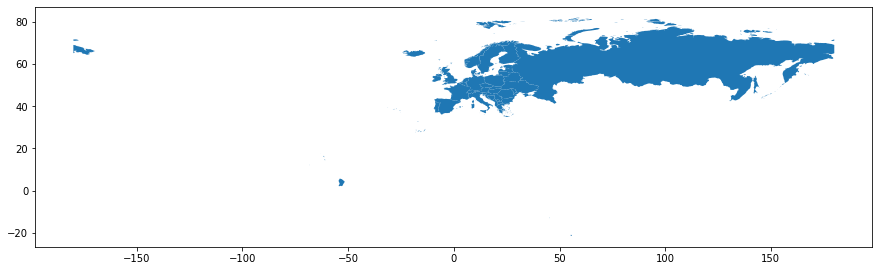

In [27]:
europe = gpd.read_file('data/europe.json')
europe.plot(figsize=(15,15));

The output is not a particularly helpful visual (pretending that our intent is to focus on continental Europe):

[top](#Table-of-Contents)
<a id='setxyaxis'></a>
#### set X and Y axis limits with Matplotlib

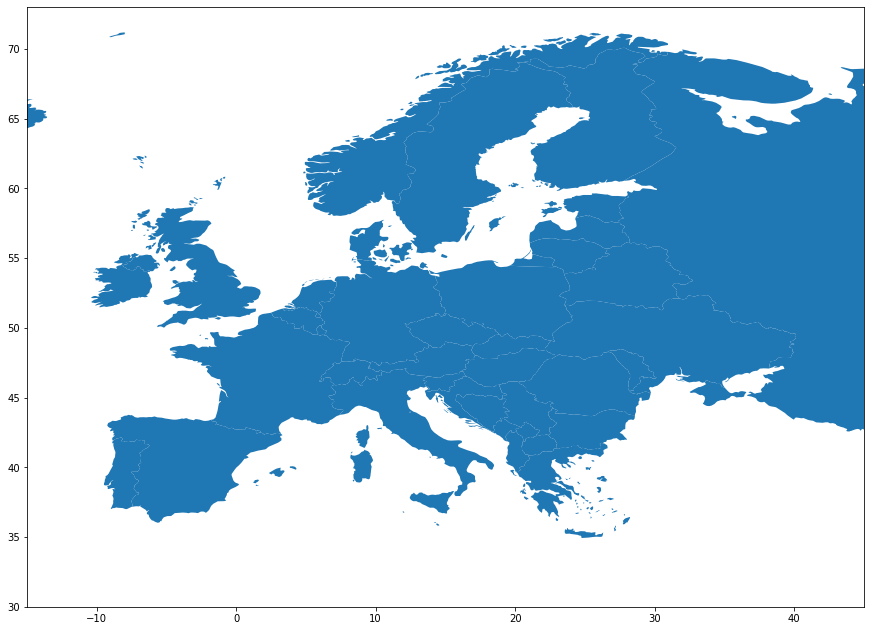

In [28]:
ax = europe.plot(figsize=(15,15))
ax.set(xlim=(-15,45), ylim=(30,73));

[top](#Table-of-Contents)
<a id='adjustproj'></a>
## Adjusting/managing projections

__Choose a country in Europe and get the projection__ from [EPSG.io](https://epsg.io/) This web site allows one to search for various map projections to obtain both their EPSG code (which GeoPandas handles as the preferred code) as well as the PROJ.4 definition.

<a id='setprojection'></a>
#### set dataframe to new projection

In [29]:
europe.to_crs(epsg=3763, inplace=True)
europe.crs

{'init': 'epsg:3763', 'no_defs': True}

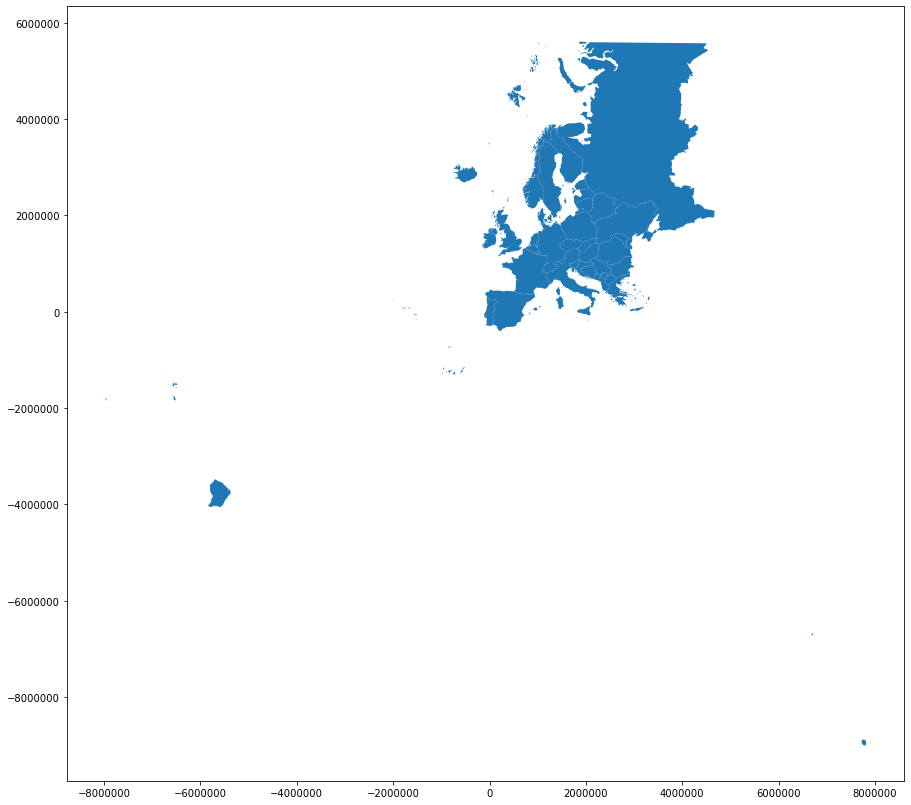

In [30]:
europe.plot(figsize=(15,15));

[top](#Table-of-Contents)
<a id='sliceportugal'></a>
#### create a new GeoDataFrame of Portugal
by slicing it from the europe GeoDataFrame (and remove Portugal from europe):

In [31]:
portugal = europe[europe['ADMIN'] == "Portugal"]
europe = europe[europe['ADMIN'] != "Portugal"]

[top](#Table-of-Contents)
<a id='plotportugal'></a>
#### plot Portugal

In [32]:
portugal.bounds

,minx,miny,maxx,maxy
15,-2.003758e+06,-745274.483292,160288.077944,274212.075788


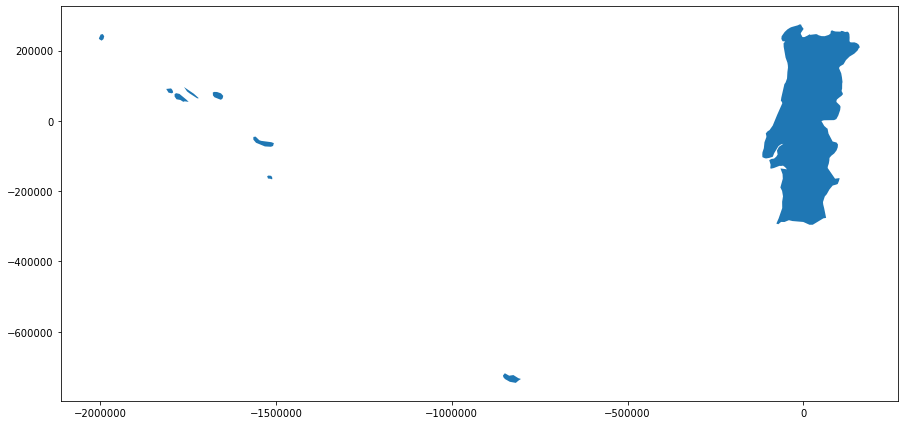

In [33]:
portugal.plot(figsize=(15,15));

[top](#Table-of-Contents)
<a id='baseeurope'></a>
#### add the europe GeoDataFrame as the basemap  
plot Portugal on top of it, using some basic color properties to help create figure-ground  
adjust the axis limits using values of meters

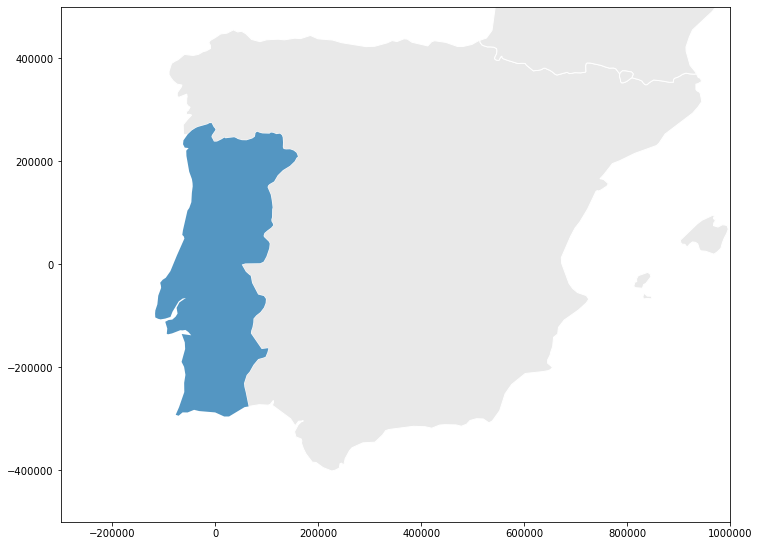

In [34]:
base = europe.plot(figsize=(12,12), edgecolor='white', color='#e9e9e9')
base.set(xlim=(-300000,1000000), ylim=(-500000, 500000))
portugal.plot(ax=base, color='#5496c2');

***
[top](#Table-of-Contents)
<a id='tilemaps'></a>
## Adding a background tile map to plots 
[GeoPandas 0.4.0 documentation](http://geopandas.org/gallery/plotting_basemap_background.html)

In [35]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

#### read data 

In [36]:
europe = gpd.read_file('data/europe.json')

#### set dataframe to a target area (Portugal in this example)

In [37]:
portugal = europe[europe['ADMIN'] == "Portugal"].copy()

#### change crs to web mercator

In [38]:
portugal.to_crs(epsg=3857, inplace=True)
portugal.crs

C:\Users\mdcr226\AppData\Local\Continuum\anaconda3\envs\sandbox\lib\site-packages\geopandas\geodataframe.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level


{'init': 'epsg:3857', 'no_defs': True}

#### examine the area available for portugal

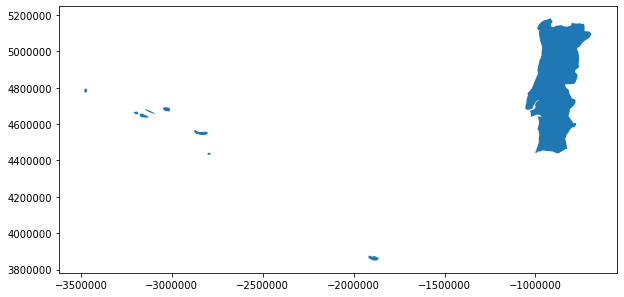

In [39]:
portugal.plot(figsize=(10,10));

#### contextily helper function

Define a small helper function that uses `contextily <https://github.com/darribas/contextily>`  
to add a map as background to an existing plot: 



In [40]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

#### a large area will take a longer time to load the basemap

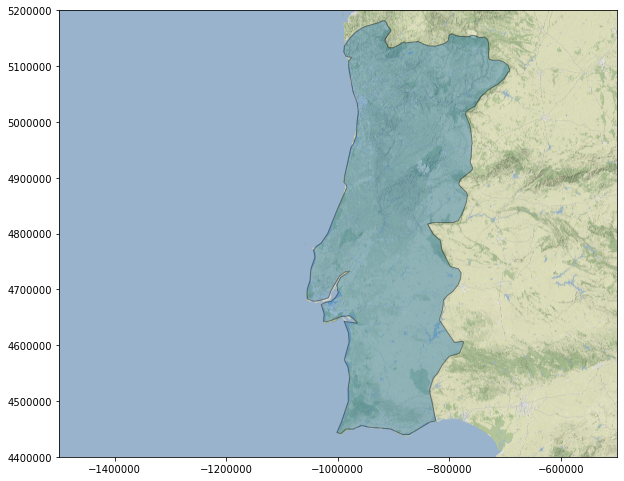

In [41]:
base = portugal.plot(figsize=(10, 15), alpha=0.4, edgecolor='k')
base.set(xlim=(-1500000,-500000), ylim=(4400000, 5200000))
add_basemap(ax=base, zoom=11)

#### select a smaller area

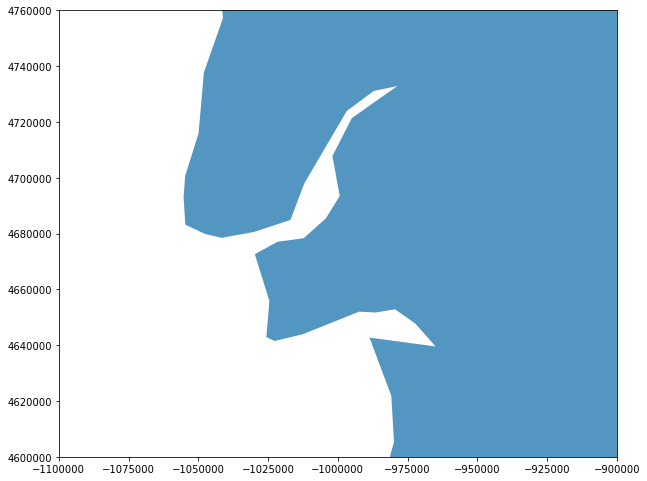

In [42]:
base = portugal.plot(figsize=(10,10), edgecolor='white', color='#e9e9e9')
base.set(xlim=(-1100000,-900000), ylim=(4600000, 4760000))
portugal.plot(ax=base, color='#5496c2')

#### add in the basemap

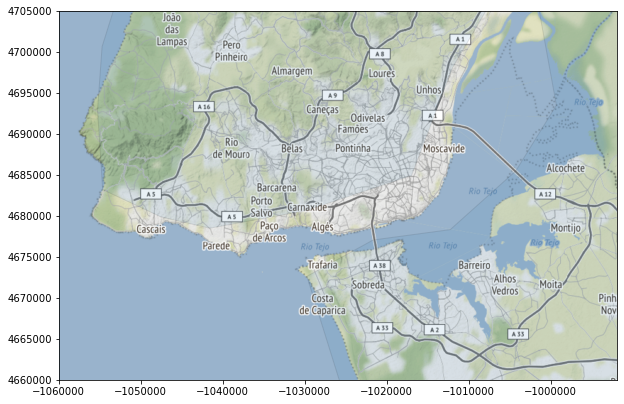

In [43]:
base = portugal.plot(figsize=(10, 15), alpha=0.09, edgecolor='k')
base.set(xlim=(-1060000,-991950), ylim=(4660000, 4705000))
add_basemap(ax=base, zoom=11)

#### Portugual - the island of [Madeira](https://en.wikipedia.org/wiki/Madeira)

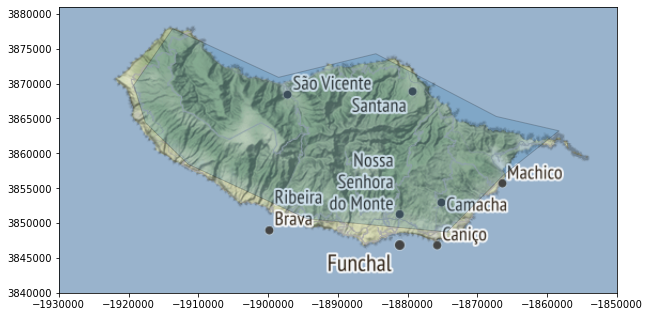

In [44]:
base = portugal.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')
base.set(xlim=(-1930000,-1850000), ylim=(3840000, 3881000))
add_basemap(ax=base, zoom=10)

***
[top](#Table-of-Contents)
<a id='plotgeoplot'></a>
## Plotting with Geoplot and GeoPandas
[GeoPandas 0.4.0 documentation](http://geopandas.org/gallery/plotting_with_geoplot.html#sphx-glr-gallery-plotting-with-geoplot-py)

In [45]:
countries = gpd.read_file('data/countries.json')

<a id='cartogram'></a>
#### use size as a visual variable using `cartogram`
Here are population estimates for countries in Africa.

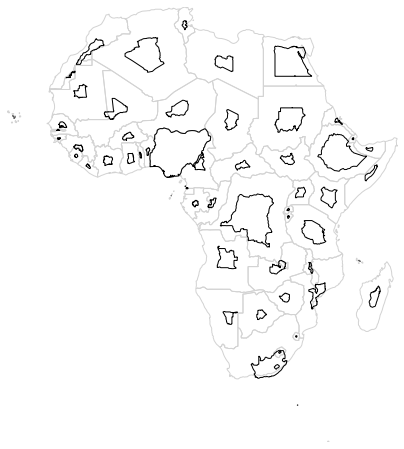

In [46]:
geoplot.cartogram(countries[countries['CONTINENT'] == 'Africa'], scale='POP_EST', limits=(0.2, 1), figsize=(7, 8));

<a id='chloropleth'></a>
#### use color as a visual variable - specify choropleth
Here we sort population estimate by country into five buckets by color.

ImportError: PySAL is required to use the 'scheme' keyword

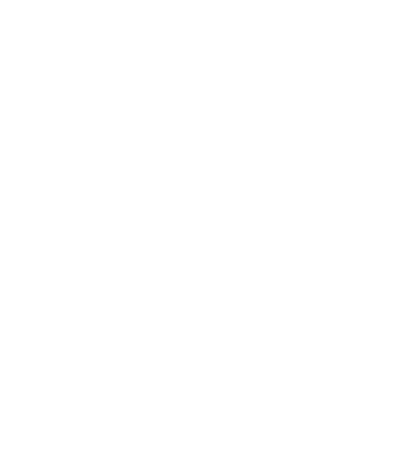

In [52]:
geoplot.choropleth(countries[countries['CONTINENT'] == 'Africa'], hue='POP_EST', cmap='Greens', figsize=(7,8), legend=True);

[top](#Table-of-Contents)
<a id='cartopy'></a>
## Re-project data into any of the map projections provided by CartoPy

In [ ]:
import geoplot
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

#### Start out by replicating the basic GeoPandas world plot using Geoplot.

In [ ]:
geoplot.polyplot(df, figsize=(12,6));

#### Orthographic

In [ ]:
import geoplot.crs as gcrs
ax = geoplot.polyplot(df, projection=gcrs.Orthographic(), figsize=(12,6))
ax.set_global()
ax.outline_patch.set_visible(True)

#### PlateCarree

In [ ]:
import geoplot.crs as gcrs
ax = geoplot.polyplot(df, projection=gcrs.PlateCarree(), figsize=(12, 6))

ax.coastlines(resolution='110m')
ax.gridlines()
ax.set_global()
ax.outline_patch.set_visible(True);

#### PlateCarree on 180 longitude

In [ ]:
ax = geoplot.polyplot(df, projection=gcrs.PlateCarree(central_longitude=180), figsize=(12, 6))
ax.coastlines(resolution='110m')
ax.gridlines()
ax.set_global()
ax.outline_patch.set_visible(True);

#### AlbersEqualArea

In [ ]:
ax = geoplot.polyplot(df, projection=gcrs.AlbersEqualArea(), figsize=(12, 6))
ax.coastlines(resolution='110m')
ax.gridlines()
ax.set_global()
ax.outline_patch.set_visible(True);

#### Robinson

In [ ]:
ax = geoplot.polyplot(df, projection=gcrs.Robinson(), figsize=(12, 6))
ax.coastlines(resolution='110m')
ax.gridlines()
ax.set_global()
ax.outline_patch.set_visible(True);

__see more 
[here](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html)__

***

[top](#Table-of-Contents)
<a id='dissolve'></a>
## Aggregate geometric features
[GeoPandas 0.4.0 documentation](http://geopandas.org/aggregation_with_dissolve.html)

#### Geopandas `dissolve` function

dissolve can be thought of as doing three things:  
 (a) it dissolves all the geometries within a given group together into a single geometric feature (using the unary_union method), and  
 (b) it aggregates all the rows of data in a group using groupby.aggregate(), and  
 (c) it combines those two results.  

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('classic')

#### read in the countries json file made earlier

In [ ]:
countries = gpd.read_file('./data/countries.json')

[top](#Table-of-Contents)
<a id='aggcontinent'></a>
#### aggregate the geodataframe by continents

In [ ]:
continents = countries.dissolve(by='CONTINENT')
continents  # display the entire dataframe

[top](#Table-of-Contents)
<a id='plotnewgeo'></a>
#### Plot the new geodataframe

In [ ]:
continents.plot(figsize=(12, 6));

<a id='displegend'></a>
### Add color based on the pop_est for each continent; display legend to the right of the plot

The way color maps are scaled can also be manipulated with the `scheme` option (if you have pysal installed).   The `scheme` option, used below, can be set to ‘equal_interval’, ‘quantiles’ or ‘percentiles’.  

Colors are set with the `cmap` option [more info in this notebook](./colormap-reference-cmap.ipynb)

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,6))
continents.plot(ax=ax, column = 'POP_EST', scheme='quantiles', cmap='YlOrRd', alpha=1, legend=True,
                            legend_kwds={'loc': 'upper left',
                                         'bbox_to_anchor': (1.0, 0.8, 0.2, 0.2),
                                         'title': 'Total Population', 
                                         'fontsize': 14,
                                         'frameon': False, });

***
[top](#Table-of-Contents)


<a id='Creating_GeoDataFrame_DataFrame_with_coordinates'></a>  
## Creating a GeoDataFrame from a DataFrame with coordinates

In [ ]:
from shapely.geometry import Point

### From longitudes and latitudes
First, let’s consider a DataFrame containing residences and their respective longitudes and latitudes.



In [ ]:
import zipfile
# https://support.spatialkey.com/spatialkey-sample-csv-data/
zf = zipfile.ZipFile('./data/FL_insurance_sample.csv.zip') 
df = pd.read_csv(zf.open('FL_insurance_sample.csv'))

In [ ]:
df.head()

<a id='GeoDataFrame_needs_shapely_object'></a>
#### A GeoDataFrame needs a shapely object
**Create a new column Coordinates as a tuple of Longitude and Latitude :**

In [ ]:
df['Coordinates'] = list(zip(df.point_longitude, df.point_latitude))

In [ ]:
df['Coordinates'].head()

<a id='transform_tuples'></a>
#### Transform tuples to Point :

In [ ]:
df['Coordinates'] = df['Coordinates'].apply(Point)

<a id='CreateGeoDataFrame'></a>
#### Create the GeoDataFrame by setting geometry with the coordinates created previously

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf.head()

#### increase decrease in total insured value (tiv)

In [ ]:
gdf['tiv_total_inc_dec'] = gdf['tiv_2012'] - gdf['tiv_2011']

In [ ]:
gdf.head()

#### Request the state outline shapefile

In [ ]:
states_raw = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_5m.zip')

In [ ]:
states_raw.head()

#### restrict data to the state of Florda

In [ ]:
florida = states_raw.loc[states_raw['STATEFP'] == '12']

<a id='plot_geodataframe'></a>
#### plot geodataframe coordinates over a state-level map of Florida

In [ ]:
ax = florida.plot(figsize=(15,15), color='white', edgecolor='black');
gdf.plot(ax=ax, linewidth=0.25, edgecolor='white', markersize=3.0, alpha=0.5, color='blue');


<a id='plot_column'></a>
#### plot a specific column
using the total insured value increase-decrease created above

In [ ]:
ax = florida.plot(figsize=(15,15), color='white', edgecolor='black');
gdf.plot(ax=ax, linewidth=0.0, markersize=5.0, column = 'tiv_total_inc_dec', 
         scheme='quantiles', cmap='YlOrRd', alpha=1.0, legend=True,
                            legend_kwds={'loc': 'center left',
                                         'title': 'Total Population', 
                                         'fontsize': 14,
                                         'frameon': False, });

***
[top](#Table-of-Contents)